# Model Analysis
using the data with only the significant features

In [500]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [501]:
df = pd.read_csv('data_signif_F.csv').drop('Unnamed: 0', axis=1)

### Features/Labels split

In [502]:
# Lables
y = df['target_return']

# Features
X = df.drop(['target_return'], axis=1)

### Rescaling features

In [503]:
from sklearn.preprocessing import StandardScaler

In [504]:
scaler = StandardScaler()

In [505]:
X_scaled = scaler.fit_transform(X)

In [506]:
X_standardize = pd.DataFrame(X_scaled,columns=X.columns)
X_standardize.head()

,exp_market_change,rates,Debt_M,Debt_Per_Capita,CPI_perc,GDP_Mill_dollars,GDP_Growth_perc,Unemployment_alt
0,-0.752487,1.614377,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
1,0.497042,0.922660,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
2,-0.240694,0.701310,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
3,2.370180,-0.363935,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
4,1.155783,-0.529947,0.357897,0.850759,-1.699192,1.431649,1.319792,-0.913907


### Train/Test split

In [507]:
from sklearn.model_selection import train_test_split

In [508]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=101)

### Training

In [509]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

In [510]:
lm = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.001)
enet = ElasticNet(alpha=0.001,l1_ratio=0.8)
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.0000001 )
svr_lin = SVR(kernel='linear', gamma=0.0000001, C=1)
svr_poly = SVR(kernel='poly', C=1, gamma=0.0000001, degree=3)

In [511]:
svr_rbf.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-07,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [512]:
svr_lin.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-07,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [513]:
svr_poly.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-07,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [514]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [515]:
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [516]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [517]:
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [518]:
pd.DataFrame(np.array([lm.intercept_, ridge.intercept_, lasso.intercept_,enet.intercept_,svr_rbf.intercept_,svr_lin.intercept_,svr_poly.intercept_]),
             columns=['Intercept'], 
             index=['Linear', 'Ridge', 'Lasso','ElasticNet','svr_rbf','svr_lin','svr_poly'])

,Intercept
Linear,0.028542
Ridge,0.025024
Lasso,0.025226
ElasticNet,0.025187
svr_rbf,0.026111
svr_lin,0.026689
svr_poly,0.026107


In [519]:
# Create dataframe for coefficents of linear model
lm_coef = pd.DataFrame(lm.coef_,index=X.columns,columns=['Linear'])

# Create dataframe for coefficents of ridge model
ridge_coef = pd.DataFrame(ridge.coef_,index=X.columns,columns=['Ridge'])

# Create dataframe for coefficents of lasso model
lasso_coef = pd.DataFrame(lasso.coef_,index=X.columns,columns=['Lasso'])

# Create dataframe for coefficents of ElasticNet model
enet_coef = pd.DataFrame(enet.coef_,index=X.columns,columns=['ElasticNet'])

# Put dataframes together
pd.concat([lm_coef, ridge_coef, lasso_coef,enet_coef], axis=1)

,Linear,Ridge,Lasso,ElasticNet
exp_market_change,-0.032147,-0.026801,-0.024900,-0.025452
rates,-0.110166,-0.048012,-0.036083,-0.037173
Debt_M,3.072819,0.008018,-0.017712,-0.018052
Debt_Per_Capita,-3.457955,-0.043383,-0.000000,-0.000440
CPI_perc,0.096454,0.021529,0.024228,0.024662
GDP_Mill_dollars,1.106572,0.034258,0.000000,0.000000
GDP_Growth_perc,0.302552,-0.027855,-0.000000,-0.000000
Unemployment_alt,0.044277,-0.008027,-0.003316,-0.003204


### Testing

In [520]:
from sklearn import metrics

In [521]:
# Get predictions for training data
fit_lm = lm.predict(X_train)
fit_ridge = ridge.predict(X_train)
fit_lasso = lasso.predict(X_train)
fit_enet = enet.predict(X_train)
fit_svr_rbf = svr_rbf.predict(X_train)
fit_svr_lin = svr_lin.predict(X_train)
fit_svr_poly = svr_poly.predict(X_train)

In [522]:
# Print MSE for models
print('MSE (train)')
print('Linear:     ', metrics.mean_squared_error(y_train, fit_lm))
print('Ridge:      ', metrics.mean_squared_error(y_train, fit_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_train, fit_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_train, fit_enet))
print('SVR_rbf:    ', metrics.mean_squared_error(y_train, fit_svr_rbf)) 
print('SVR_lin:    ', metrics.mean_squared_error(y_train, fit_svr_lin)) 
print('SVR_poly:   ', metrics.mean_squared_error(y_train, fit_svr_poly))

MSE (train)
Linear:      0.014150426324373088
Ridge:       0.014958965337058134
Lasso:       0.015038609880689849
ElasticNet:  0.015033705749464072
SVR_rbf:     0.016259130455625485
SVR_lin:     0.01497430571408911
SVR_poly:    0.016259501823387538


In [523]:
print('MSE (train)')
print('Linear:     ', lm.score(X_train, y_train))
print('Ridge:      ', ridge.score(X_train, y_train))
print('Lasso:      ', lasso.score(X_train, y_train))
print('ElasticNet: ', enet.score(X_train, y_train))
print('SVR_rbf:    ', svr_rbf.score(X_train, y_train))
print('SVR_lin:    ', svr_lin.score(X_train, y_train)) 
print('SVR_poly:   ', svr_poly.score(X_train, y_train))

MSE (train)
Linear:      0.12971196763389758
Ridge:       0.07998471487764014
Lasso:       0.07508636824291348
ElasticNet:  0.07538798507177147
SVR_rbf:     2.117760667730284e-05
SVR_lin:     0.07904124178107008
SVR_poly:    -1.6624768304218662e-06


In [524]:
print('R-SQUARED SCORES')
print('Linear:     ', metrics.r2_score(y_train, lm.predict(X_train)))
print('Ridge:      ', metrics.r2_score(y_train, ridge.predict(X_train)))
print('Lasso:      ', metrics.r2_score(y_train, lasso.predict(X_train)))
print('ElasticNet: ', metrics.r2_score(y_train, enet.predict(X_train)))
print('svr_lin:    ', metrics.r2_score(y_train, svr_lin.predict(X_train)))

R-SQUARED SCORES
Linear:      0.12971196763389758
Ridge:       0.07998471487764014
Lasso:       0.07508636824291348
ElasticNet:  0.07538798507177147
svr_lin:     0.07904124178107008


In [525]:
def adj_r2_score(model,y,yhat):
    adj = 1 - (1 - metrics.r2_score(y,yhat)) * float(len(y)-1) / (len(y)-len(model.coef_)-1)
    return adj

In [526]:
print('Adjusted R-SQUARED SCORES')
print('Linear:     ', adj_r2_score(lm, y_train, lm.predict(X_train)))
print('Ridge:      ', adj_r2_score(ridge, y_train, ridge.predict(X_train)))
print('Lasso:     ', adj_r2_score(lasso, y_train, lasso.predict(X_train)))
print('ElasticNet:', adj_r2_score(enet, y_train, enet.predict(X_train)))
print('svr_lin:    ', adj_r2_score(svr_lin, y_train, svr_lin.predict(X_train)))

Adjusted R-SQUARED SCORES
Linear:      0.10117793378582873
Ridge:       0.049820279299857884
Lasso:      0.044761331136123794
ElasticNet: 0.0450728370413378
svr_lin:     0.07537208338179147


---
### Predicting

In [527]:
pred_lm = lm.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_enet = enet.predict(X_test)
pred_svr_rbf = svr_rbf.predict(X_test) 
pred_svr_lin = svr_lin.predict(X_test)
pred_svr_poly = svr_poly.predict(X_test)

### Testing

Firstly we plot the actual returns vs. the predictions by our models.

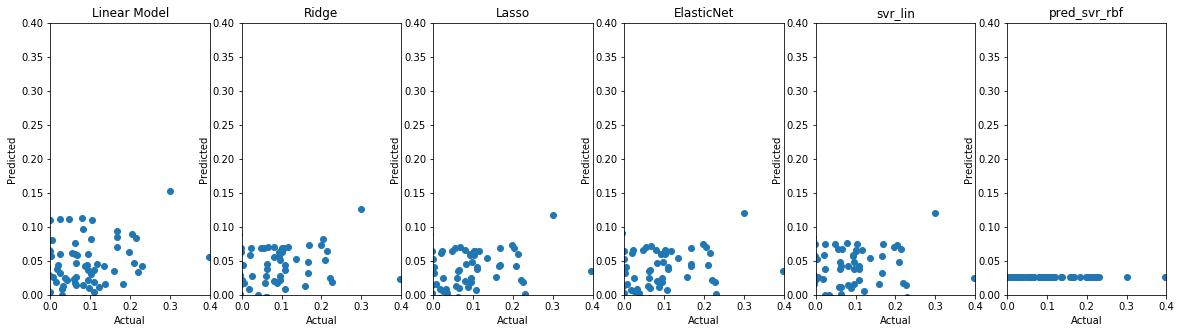

In [528]:
# Create figure and axes
f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=6)

# Create list of titles and predictions to use in for loop
pred = [pred_lm, pred_ridge, pred_lasso, pred_enet,pred_svr_lin,pred_svr_rbf]
title = ['Linear Model', 'Ridge', 'Lasso', 'ElasticNet','svr_lin','pred_svr_rbf']

# Loop through all axes to plot each model's results 
for i in range(6):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 0.4)
    ax[i].set_ylim(0, 0.4)
    ax[i].scatter(y_test,pred[i]) 

Secondly we calculate the MSE for each model on our testing set. 

In [529]:
print('MSE:')
print('Linear:     ', metrics.mean_squared_error(y_test, pred_lm))
print('Ridge:      ', metrics.mean_squared_error(y_test, pred_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_test, pred_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_test, pred_enet))
print('SVR_rbf:    ', metrics.mean_squared_error(y_test, pred_svr_rbf)) 
print('SVR_lin:    ', metrics.mean_squared_error(y_test, pred_svr_lin)) 
print('SVR_poly:   ', metrics.mean_squared_error(y_test, pred_svr_poly))

MSE:
Linear:      0.013642763896953482
Ridge:       0.013745006688510317
Lasso:       0.013647294790990708
ElasticNet:  0.013623906810932602
SVR_rbf:     0.015666776045723675
SVR_lin:     0.01377140015203667
SVR_poly:    0.01566725902651135


In [530]:
print('Adjusted R-SQUARED SCORES')
print('Linear:     ', adj_r2_score(lm, y_test, lm.predict(X_test)))
print('Ridge:      ', adj_r2_score(ridge, y_test, ridge.predict(X_test)))
print('Lasso:      ', adj_r2_score(lasso, y_test, lasso.predict(X_test)))
print('ElasticNet: ', adj_r2_score(enet, y_test, enet.predict(X_test)))
print('svr_lin:    ', adj_r2_score(svr_lin, y_test, svr_lin.predict(X_test)))

Adjusted R-SQUARED SCORES
Linear:      0.056709941424155974
Ridge:       0.04964065476310464
Lasso:       0.05639666565877155
ElasticNet:  0.05801376093694377
svr_lin:     0.11010818120501276
